**2.1** Load **week2.csv** file into a dataframe. Make sure type of date column is datetime64. convert date column to index of the dataframe.<br>
Plot the closing price for each of the days for the entire timeframe.

datetime64[ns]


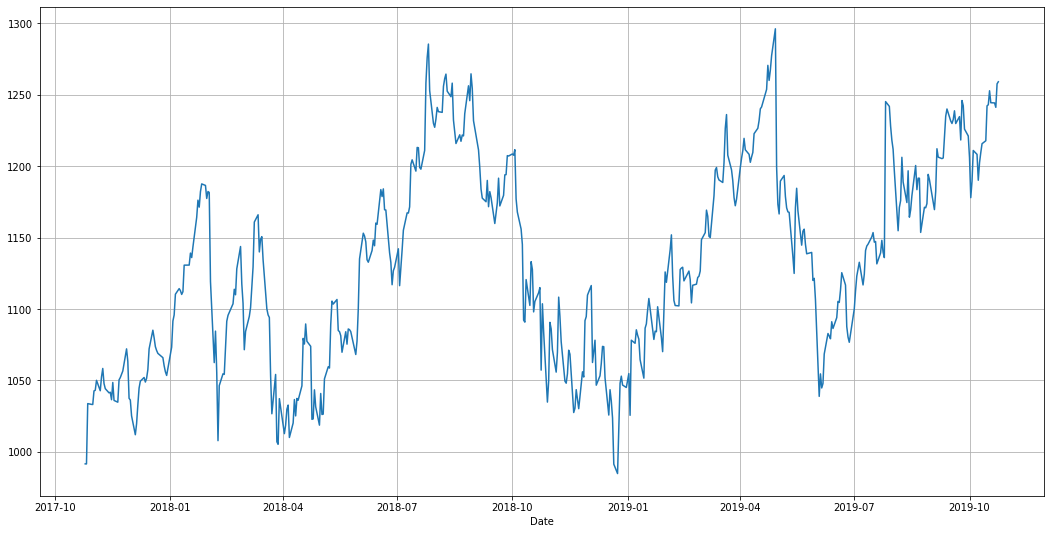

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

stock = pd.read_csv("output/week2.csv")   # load the week2.csv file into the stock dataframe
#print(stock.info())    # checking datatypes of the columns

stock['Date'] = stock['Date'].astype('datetime64')    # converting Date column to datetime64 datatype
print(stock['Date'].dtype)    # checking for the datatype of Date column

stock = stock.set_index('Date')   # set the index to Date column   
#print(stock.head())    # checking if the index changed

plt.figure(figsize=(18,9))
plt.xlabel('Date')
plt.grid(True)
plt.plot(stock['Close Price'])
plt.show()

**2.2** Display stem plot of daily change in percentage. Observe whenever there's a large change.<br>
A stem plot is a discrete series plot, ideal for plotting daywise data.

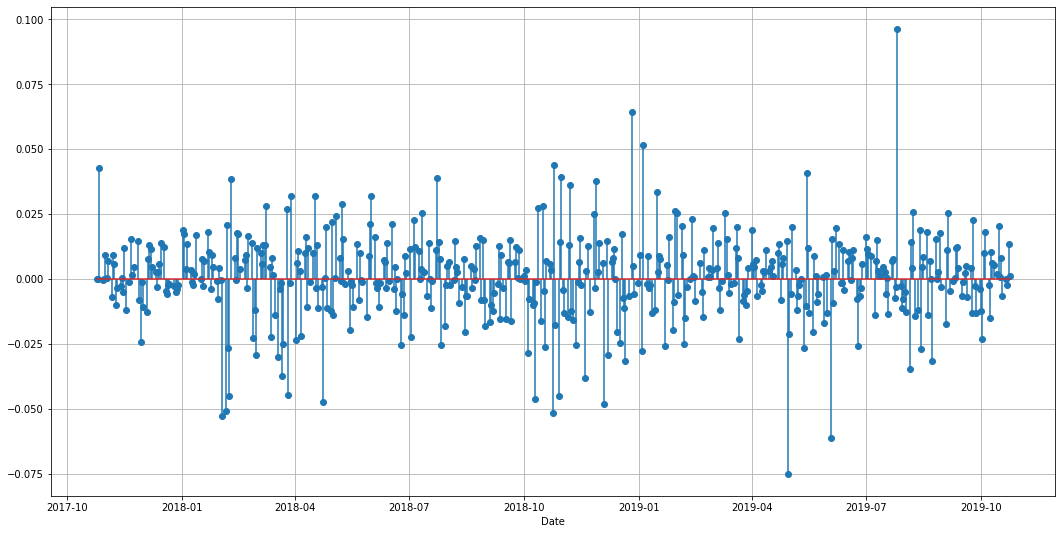

In [0]:
plt.figure(figsize=(18,9))
plt.xlabel('Date')
plt.grid(True)
plt.stem(stock.index,stock['Day_Perc_Change'],use_line_collection=True)
plt.show()

**2.3** Plot the daily volumes. Compare the percentage stem plot to it. <br>Document your analysis of the relationship between volume and percentage change.<br><br>
**Answer** The daily percentage change seems to be directly proportional to the traded volume of the day. Whenever the traded volumes are high, either buy/sell there seems to be a rise in daily percentage change, that is, it's negative when most of the traded volume was sold and positive when most of the traded volume was bought.


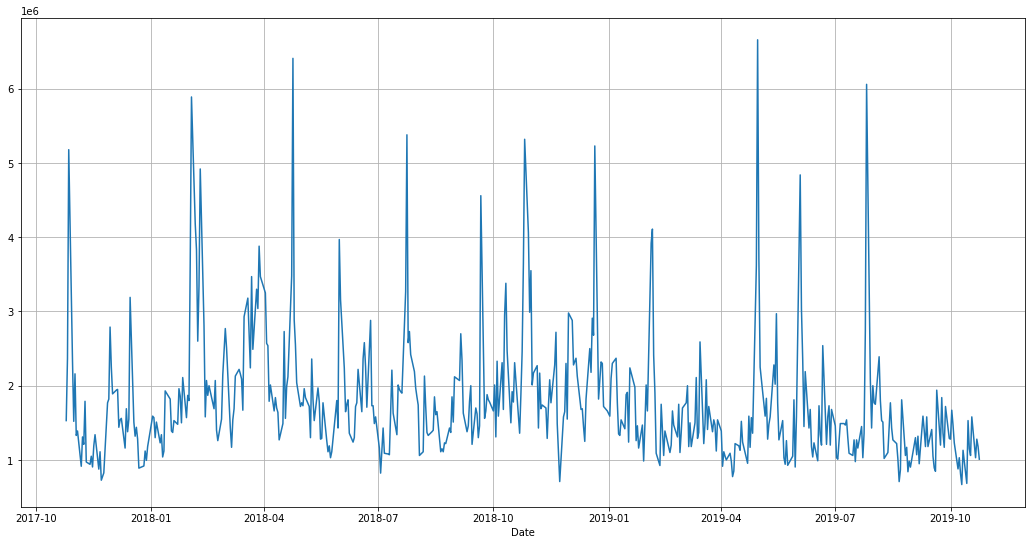

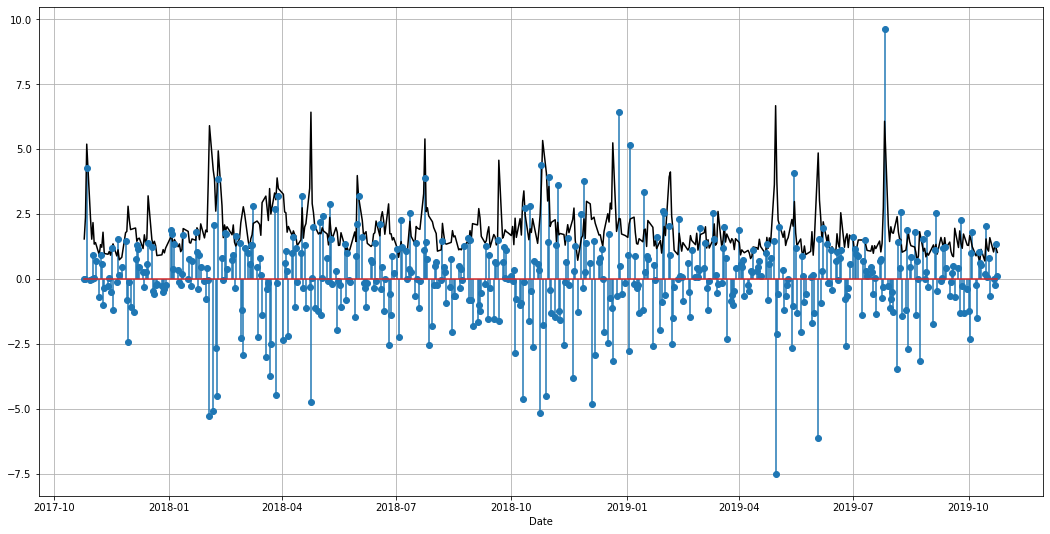

In [0]:
plt.figure(figsize=(18,9))
plt.xlabel('Date')
plt.grid(True)
plt.plot(stock['Total Traded Quantity'])
plt.show()

plt.figure(figsize=(18,9))
plt.xlabel('Date')
plt.grid(True)
plt.plot(stock['Total Traded Quantity']/1e6,'k')
plt.stem(stock.index,stock['Day_Perc_Change']*100,use_line_collection=True)
plt.show()

**2.4** Plot a pie chart for all the **Trend** to know about relative frequency of each trend.<br>
Create a bar plot of average and median values of **Total Traded Quantity** by **Trend** type.

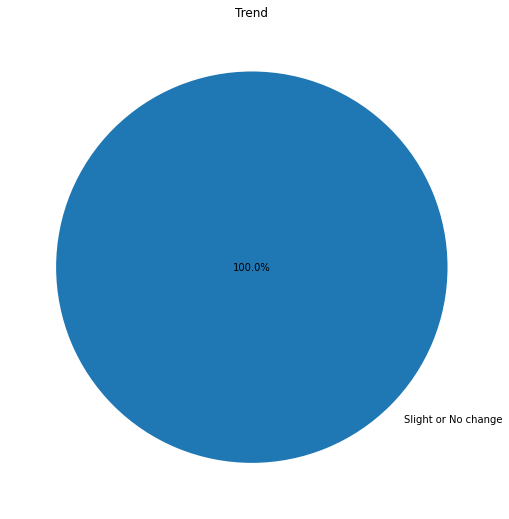

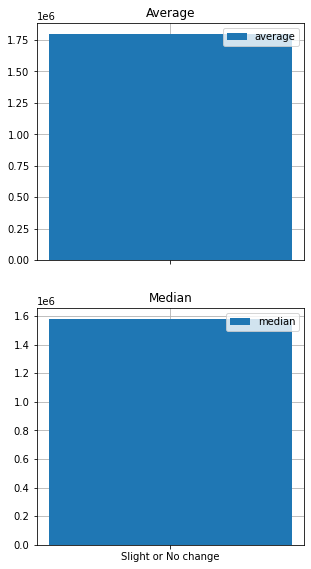

In [0]:
lbl = stock['Trend'].unique()   # different values of trend to be used as label
plt.figure(figsize=(9,9))
#plt.ylabel('Trend')   # To place Trend as specified in the plot in question
plt.title('Trend')    # setting 'Trend' as the title was more intuitive
plt.pie(stock['Trend'].value_counts(),labels=lbl,autopct='%.1f%%',pctdistance=0,startangle=135)   #since there was only one label for Trend in case of GOOG, the pctdistance and startangle are set to make plot look attractive. other values could be used in other cases.
plt.show()

groupVol = stock.groupby('Trend')['Total Traded Quantity']

plt.figure(figsize=(4.8,9.6))

ax1 = plt.subplot(211)
ax1.set_axisbelow(True)
ax1.grid(True)
ax1.set_title('Average')
ax1.bar(lbl,groupVol.mean(),label='average')
ax1.legend()

plt.setp(ax1.get_xticklabels(),visible=False)   #both subplots have a shared axia, hence seting visibility False for first

ax2 = plt.subplot(212,sharex=ax1)
ax2.set_axisbelow(True)
ax2.grid(True)
ax2.set_title('Median')
ax2.bar(lbl,groupVol.median(),label='median')
ax2.legend()

plt.show()

**2.5** Plot the daily return percentage distribution as a histogram.

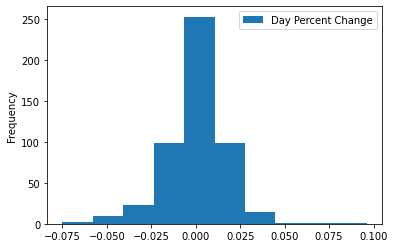

In [0]:
stock['Day_Perc_Change'].plot.hist(label='Day Percent Change')
plt.legend()

**2.6** Create a dataframe which contains the **Close Price** of five stocks. Create a new dataframe which containls **Daily Percent Change** calculated from the **Close Price** dataframe. Drop **NaN** from this dataframe.<br>
Using seaborn, analyse the correlation between the percent changes in the five stocks.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


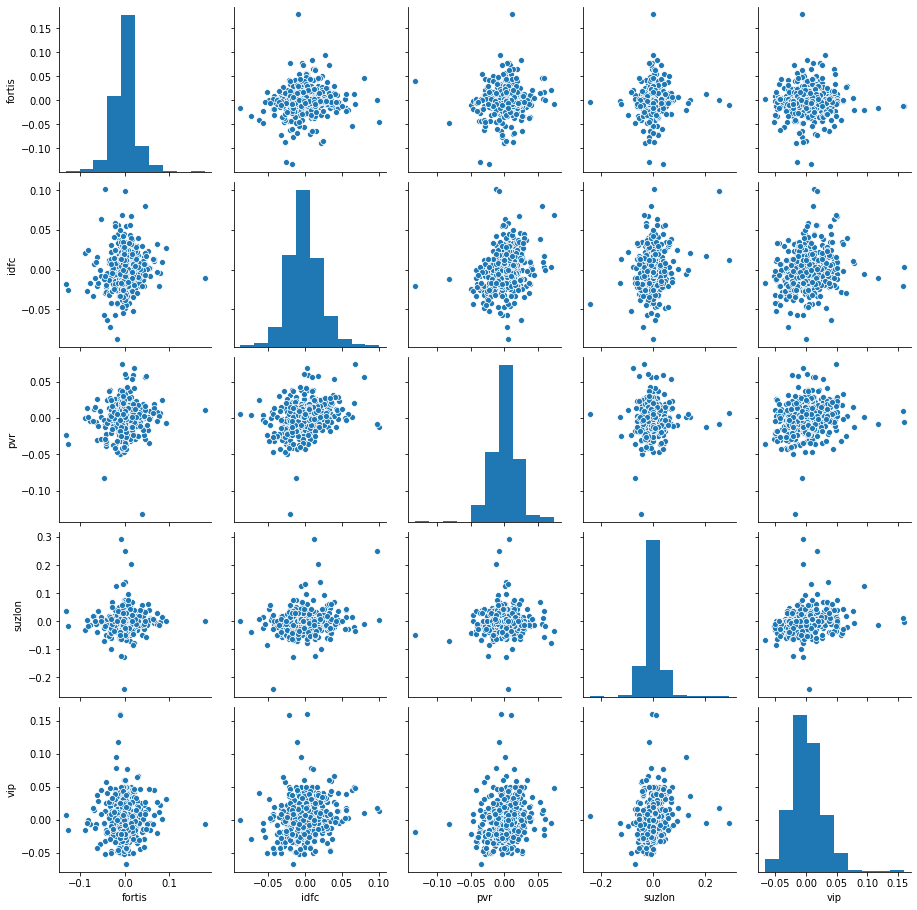

In [0]:
import seaborn as sns   # importing seaborn for plotting statistical relationships

fortis = pd.read_csv("data/Small_Cap/FORTIS.csv")
idfc = pd.read_csv("data/Small_Cap/IDFC.csv")
pvr = pd.read_csv("data/Small_Cap/PVR.csv")
suzlon = pd.read_csv("data/Small_Cap/SUZLON.csv")
vip = pd.read_csv("data/Small_Cap/VIPIND.csv")
nifty = pd.read_csv("data/Nifty50.csv")

# retaining the rows where series = EQ
fortis = fortis[fortis['Series']=='EQ']
idfc = idfc[idfc['Series']=='EQ']
pvr = pvr[pvr['Series']=='EQ']
suzlon = suzlon[suzlon['Series']=='EQ']
vip = vip[vip['Series']=='EQ']

# checking the shapes of the dataframes for compatibility
# fortis.shape
# idfc.shape
# pvr.shape
# suzlon.shape
# vip.shape

closePrice = pd.DataFrame({'fortis':fortis['Close Price'], 'idfc':idfc['Close Price'], 'pvr':pvr['Close Price'], 'suzlon':suzlon['Close Price'], 'vip':vip['Close Price']})

dayPerChange = closePrice.pct_change()    # calculate the daily percent change
dayPerChange = dayPerChange.dropna()    # drop the NaN
#dayPerChange.head()   # checking wheter NaN has been dropped

# using PairGrid to visualize correlation
# g = sns.PairGrid(dayPerChange)
# g.map(sns.scatterplot)
# g.map(sns.barplot)

sns.pairplot(dayPerChange)    # same can be achieved using pairplot

**2.7** Calculate the 7 day rolling average of the percentage change of a stock. Then calculate the volatility which is the standard deviation and plot the values.

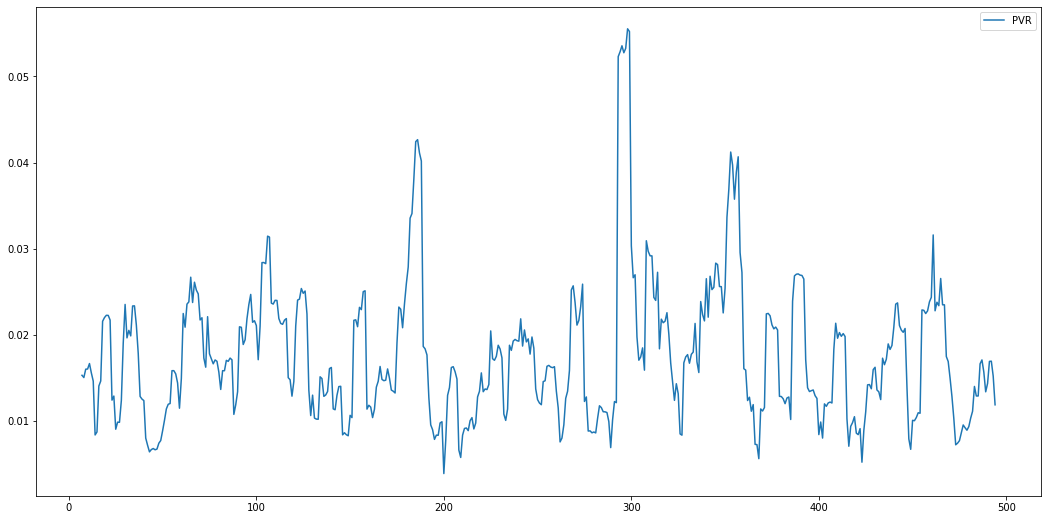

In [0]:
rolPVR = dayPerChange['pvr'].rolling(7)
# rolavgPVR = rolPVR.mean().dropna()    # rolling average 
volatilityPVR = rolPVR.std().dropna()   # standard deviation

plt.figure(figsize=(18,9))
plt.plot(volatilityPVR,label='PVR')
plt.legend()
plt.show()

**2.8** Calculate the volatility for nifty index and compare the two.

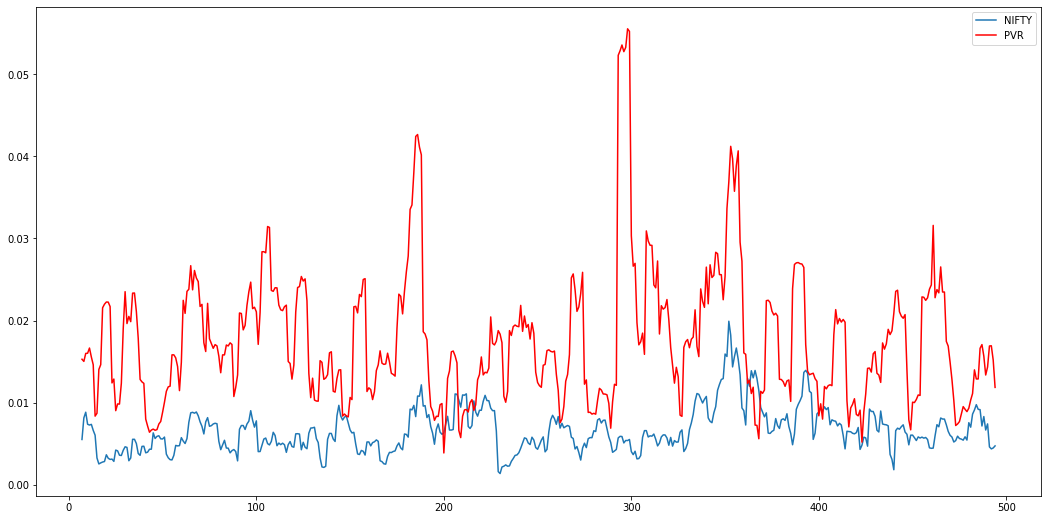

In [0]:
# added one more column to closePrice and dayPerChange, compiling pairplot() after this cell could lead to a different outcome
closePrice['nifty'] = nifty['Close']
dayPerChange['nifty'] = closePrice['nifty'].pct_change().dropna()

rolNIFTY = dayPerChange['nifty'].rolling(7)
volatilityNIFTY = rolNIFTY.std().dropna()

plt.figure(figsize=(18,9))
plt.plot(volatilityNIFTY,label='NIFTY')
plt.plot(volatilityPVR,'r',label='PVR')
plt.legend()
plt.show()

**2.9** Plot the 21 day and 34 day moving average with the average price and decide a call.

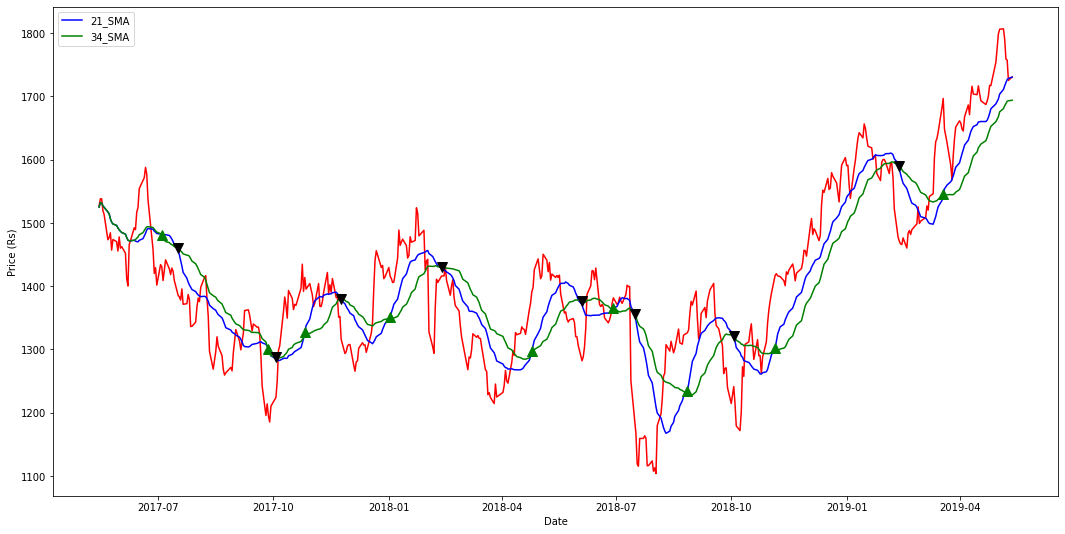

In [0]:
# kindly suggest if an alternate easier solution exists. plotting SMA for PVR.
def signum(x):
  for i in range(len(x)):
      if x[x.index[i]]<0:
        x[x.index[i]]=-1
      elif x[x.index[i]]>0:
        x[x.index[i]]=1
  return x

def call(var):
  buy = []
  buydate = []
  sell = []
  selldate = []
  for i in range(1,len(var)):
      if(var[var.index[i]]==1 and var[var.index[i-1]]==-1):
        buy.append(sma21[var.index[i-1]])   # using y instead of sma21 would result in placing the margins over the daily average price
        buydate.append(x[var.index[i-1]])
      elif(var[var.index[i]]==-1 and var[var.index[i-1]]==1):
        sell.append(sma34[x.index[i-1]])    # similarly y can be used instead of sma34 or sma 21
        selldate.append(x[var.index[i-1]])
  return buydate,buy,selldate,sell

y = pvr['Average Price']    # for plotting average price
x = pvr['Date'].astype('datetime64')
clpPVR = pvr['Close Price']   # since the investopedia definition suggested to take the moving average of closing prices. the same can be done using Average Price column
sma21 = clpPVR.rolling(21,1).mean()   # not correct according to investopedia's definition, but for the sake of plotting without errors and as plotted in the question
sma34 = clpPVR.rolling(34,1).mean()

sub = sma21-sma34
sub = signum(sub)
buydate,buy,selldate,sell = call(sub)

plt.figure(figsize=(18,9))
plt.plot(x,y,'r')
plt.plot(x,sma21,'b',label='21_SMA')
plt.plot(x,sma34,'g',label='34_SMA')
plt.plot(buydate,buy,'g^',markersize=10)
plt.plot(selldate,sell,'kv',markersize=10)
plt.xlabel('Date')
plt.ylabel('Price (Rs)')
plt.legend()
plt.show()

**2.10** Plot the bollinger bands for this stock. Save the csv files.

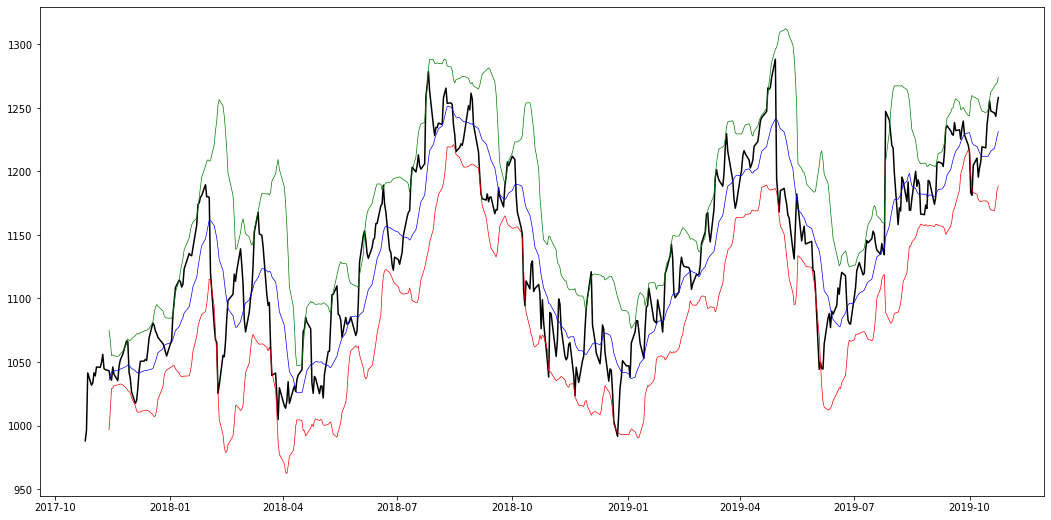

In [0]:
# plotting bollinger bands for GOOG
stockReverse = stock[::-1]    # reversed the dataframe for ease in plotting since it is dated backwards
typical = (stockReverse['High Price']+stockReverse['Low Price']+stockReverse['Close Price'])/3   # follows from the definition of investopedia for typical price
rol = typical.rolling(14)   # according to investopedia formula for calculating moving averages, although it mentions closing priice is used for calculating MA but uses TP in the formula
ma  = rol.mean().fillna(0)   # filling NaN so that it could be saved as series in a dataframe
stdev = rol.std().fillna(0)
bolu = ma + 2*stdev   # according to investopedia
bold = ma - 2*stdev
x = stockReverse.index

plt.figure(figsize=(18,9))
plt.plot(x,typical,'k')
plt.plot(x[13:],ma[13:],'b',label='Moving Average',linewidth=0.7)
plt.plot(x[13:],bolu[13:],'g',label='Bollinger Up',linewidth=0.7)
plt.plot(x[13:],bold[13:],'r',label='Bollinger Down',linewidth=0.7)
plt.show()

In [0]:
pd.options.mode.chained_assignment = None   # to get rid of SettingWithCopyWarning
stockReverse['typical']=typical   # adding the columns to be saved as csv
stockReverse['ma14']=ma
stockReverse['standardDeviation']=stdev

# save the csv files
stockReverse.to_csv('output/week2GOOG_reverse.csv')
closePrice.to_csv('output/week2ClosePrice.csv',index=False)
dayPerChange.to_csv('output/week2DayPercentChange.csv',index=False)
fortis.to_csv('output/week2FORTISEQ.csv',index=False)
idfc.to_csv('output/week2IDFCEQ.csv',index=False)
pvr.to_csv('output/week2PVREQ.csv',index=False)
suzlon.to_csv('output/week2SUZLONEQ.csv',index=False)
vip.to_csv('output/week2VIPINDEQ.csv',index=False)